<a href="https://colab.research.google.com/github/Temple2001/ML_practice/blob/main/codes/LogisticRegression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Example 1

In [1]:
import numpy as np
from datetime import datetime

np.random.seed(0)

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [ ]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [ ]:
x_data = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(10,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(10,1)

print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

x_data.shape =  (10, 1) , t_data.shape =  (10, 1)


In [ ]:
W = np.random.rand(1,1)
b = np.random.rand(1)

print('W = ', W, ', W.shape = ', W.shape, ', b = ', b, ', b.shape = ', b.shape)

W =  [[0.60276338]] , W.shape =  (1, 1) , b =  [0.54488318] , b.shape =  (1,)


In [ ]:
def loss_func(x, t):
    delta = 1e-7

    z = np.dot(x, W) + b
    y = sigmoid(z)

    return -np.sum(t*np.log(y+delta) + (1-t)*np.log((1-y)+delta))
    # return (np.sum((t-y)**2)) / (len(x)) -> MSB

def error_val(x, t):
    delta = 1e-7

    z = np.dot(x, W) + b
    y = sigmoid(z)

    return -np.sum(t*np.log(y+delta) + (1-t)*np.log((1-y)+delta))
    # return (np.sum((t-y)**2)) / (len(x)) -> MSB

def predict(test_data):
    z = np.dot(test_data, W) + b
    y = sigmoid(z)

    if y >= 0.5:
        result = 1
    else:
        result = 0
  
    return y, result

In [ ]:
learning_rate = 1e-2

f = lambda x : loss_func(x_data, t_data)

print('initial error value = ', error_val(x_data, t_data))

start_time = datetime.now()

for step in range(100001):
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)

    if (step % 5000 == 0):
        print('step = ', step, ', error value = ', error_val(x_data, t_data))

end_time = datetime.now()

print('')
print('Elapsed time => ', end_time - start_time)

initial error value =  28.818019848960184
step =  0 , error value =  12.07702817749831
step =  5000 , error value =  0.8455208271480559
step =  10000 , error value =  0.621105834119665
step =  15000 , error value =  0.5095648493166686
step =  20000 , error value =  0.43783320654711444
step =  25000 , error value =  0.3861872518769276
step =  30000 , error value =  0.3465576894276898
step =  35000 , error value =  0.314876438732039
step =  40000 , error value =  0.28881188707818484
step =  45000 , error value =  0.2669061321875256
step =  50000 , error value =  0.24818845354840835
step =  55000 , error value =  0.23198114208438508
step =  60000 , error value =  0.2177932469227318
step =  65000 , error value =  0.20525843461807425
step =  70000 , error value =  0.1940966633087609
step =  75000 , error value =  0.1840894962098742
step =  80000 , error value =  0.17506361628901515
step =  85000 , error value =  0.16687947747373308
step =  90000 , error value =  0.15942328631868707
step =  

In [ ]:
test_data = np.array([13.0])
(real_val, logical_val) = predict(test_data)
print(real_val, logical_val)

[0.52082836] 1


In [ ]:
test_data = np.array([11.0])
(real_val, logical_val) = predict(test_data)
print(real_val, logical_val)

[0.00611016] 0


In [ ]:
test_data = np.array([3.0])
(real_val, logical_val) = predict(test_data)
print(real_val, logical_val)

[6.29156451e-12] 0


#Example 2

In [2]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [3]:
x_data = [[2,4],[4,11],[6,6],[8,5],[10,7],[12,16],[14,8],[16,3],[18,7]]
t_data = [0,0,0,0,1,1,1,1,1]

W = np.random.rand(2, 1)
b = np.random.rand(1)

print('W = ', W, ', W.shape = ', W.shape, ', b = ', b, ', b.shape = ', b.shape)

W =  [[0.5488135 ]
 [0.71518937]] , W.shape =  (2, 1) , b =  [0.60276338] , b.shape =  (1,)


In [4]:
def loss_func(x, t):
    delta = 1e-7

    z = np.dot(x, W) + b
    y = sigmoid(z)

    return -np.sum(t*np.log(y+delta) + (1-t)*np.log((1-y)+delta))

def error_val(x, t):
    delta = 1e-7

    z = np.dot(x, W) + b
    y = sigmoid(z)

    return -np.sum(t*np.log(y+delta) + (1-t)*np.log((1-y)+delta))

def predict(test_data):
    z = np.dot(test_data, W) + b
    y = sigmoid(z)

    if y >= 0.5:
        result = 1
    else:
        result = 0

    return y, result

In [6]:
learning_rate = 1e-2

input_xdata = np.array(x_data)
input_tdata = np.array(t_data).reshape(len(t_data), 1)

f = lambda x : loss_func(input_xdata, input_tdata)

print('initial error value = ', error_val(input_xdata, input_tdata))

start_time = datetime.now()

for step in range(100001):
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)

    if (step % 5000 == 0):
        print('step = ', step, 'error value = ', error_val(input_xdata, input_tdata))

end_time = datetime.now()

print('')
print('Elapsed time => ', end_time - start_time)

initial error value =  31.989985049872136
step =  0 error value =  21.155775561285513
step =  5000 error value =  0.605372093921429
step =  10000 error value =  0.40460865259622114
step =  15000 error value =  0.30717188727050876
step =  20000 error value =  0.24747210393094068
step =  25000 error value =  0.20700760439720442
step =  30000 error value =  0.17778892090805623
step =  35000 error value =  0.15571997150309752
step =  40000 error value =  0.13847565618051416
step =  45000 error value =  0.12463783558851207
step =  50000 error value =  0.11329289021655331
step =  55000 error value =  0.10382607241181756
step =  60000 error value =  0.09580877818938051
step =  65000 error value =  0.08893319938472193
step =  70000 error value =  0.08297265988852254
step =  75000 error value =  0.07775659371971212
step =  80000 error value =  0.07315423124112233
step =  85000 error value =  0.06906365562893353
step =  90000 error value =  0.0654042768106031
step =  95000 error value =  0.06211

In [7]:
test_data = np.array([3,17])
(real_val, logical_val) = predict(test_data)
print(real_val, logical_val)

test_data = np.array([5,8])
(real_val, logical_val) = predict(test_data)
print(real_val, logical_val)

test_data = np.array([7,21])
(real_val, logical_val) = predict(test_data)
print(real_val, logical_val)

print('W = ', W, ', b = ', b)

[0.15441576] 0
[0.0007137] 0
[0.99999641] 1
W =  [[2.40840258]
 [1.15119589]] , b =  [-28.49591692]


#Example 3

In [8]:
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [4]:
class SimpleTest:
    
    def __init__(self, xdata, tdata, learning_rate, iteration_count):

        if xdata.ndim == 1:
            self.xdata = xdata.reshape(len(xdata), 1)
            self.tdata = tdata.reshape(len(tdata), 1)
        elif xdata.ndim == 2:
            self.xdata = xdata
            self.tdata = tdata
        
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count

        self.W = np.random.rand(xdata.shape[1], 1)
        self.b = np.random.rand(1)

        self.loss_val_list = []

        print('SimpleTest Object is created')
    
    def loss_func(self):
        delta = 1e-7

        z = np.dot(self.xdata, self.W) + self.b
        y = sigmoid(z)

        return -np.sum(self.tdata*np.log(y+delta) + (1-self.tdata)*np.log((1-y)+delta))

    def error_val(self):
        delta = 1e-7

        z = np.dot(self.xdata, self.W) + self.b
        y = sigmoid(z)

        return -np.sum(self.tdata*np.log(y+delta) + (1-self.tdata)*np.log((1-y)+delta))
    
    def predict(self, test_data):
        z = np.dot(test_data, self.W) + self.b
        y = sigmoid(z)

        if y >= 0.5:
            result = 1
        else:
            result = 0
        
        return y, result
    
    def display_lossval_trend(self):
        plt.title('Loss Value Trend')
        plt.xlabel('epochs ( X 1000)')
        plt.ylabel('loss value')
        plt.grid()

        label_str = 'lr=' + str(self.learning_rate) + ', epoch=' + str(self.iteration_count)

        plt.plot(self.loss_val_list, ls='--', lw=2, color='r', label=label_str)
        plt.legend(loc='best')

        plt.show()
    
    def train(self):
        f = lambda x : self.loss_func()

        print('initial error value = ', self.error_val())

        start_time = datetime.now()

        for step in range(self.iteration_count):
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
            self.b -= self.learning_rate * numerical_derivative(f, self.b)

            if (step % (int)(0.05*self.iteration_count) == 0):
                current_loss_val = self.error_val()
                print('step = ', step, ', error value = ', current_loss_val)
                self.loss_val_list.append(current_loss_val)
        
        end_time = datetime.now()

        print('')
        print('Elapsed time => ', end_time - start_time)

In [5]:
x_data = np.array( [ [2, 4], [4, 11], [6, 6], [8, 5], [10, 7], [12, 16], [14, 8], [16, 3], [18, 7] ] )
t_data = np.array( [0, 0, 0, 0, 1, 1, 1, 1, 1] ).reshape(9, 1)

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

x_data.shape =  (9, 2) , t_data.shape =  (9, 1)


In [6]:
obj1 = SimpleTest(x_data, t_data, 1e-2, 100001)
obj1.train()

SimpleTest Object is created
initial error value =  31.987989823677083
step =  0 , error value =  21.153788725085356
step =  5000 , error value =  0.6053721152075823
step =  10000 , error value =  0.40460866102294285
step =  15000 , error value =  0.3071718920969315
step =  20000 , error value =  0.24747210708063458
step =  25000 , error value =  0.2070076066134636
step =  30000 , error value =  0.17778892255033538
step =  35000 , error value =  0.15571997276750238
step =  40000 , error value =  0.13847565718323426
step =  45000 , error value =  0.12463783640270983
step =  50000 , error value =  0.11329289089055021
step =  55000 , error value =  0.1038260729787625
step =  60000 , error value =  0.0958087786727894
step =  65000 , error value =  0.088933199801698
step =  70000 , error value =  0.08297266025182055
step =  75000 , error value =  0.07775659403904457
step =  80000 , error value =  0.07315423152397402
step =  85000 , error value =  0.06906365588119026
step =  90000 , error va

[0.15441576] 0
[0.0007137] 0
[0.99999641] 1


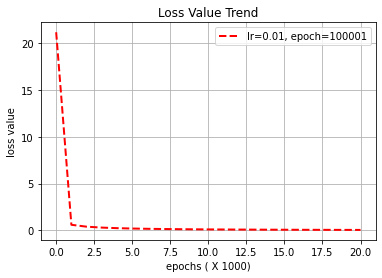

In [9]:
test_data = np.array([3,17])
(real_val, logical_val) = obj1.predict(test_data)
print(real_val, logical_val)

test_data = np.array([5,8])
(real_val, logical_val) = obj1.predict(test_data)
print(real_val, logical_val)

test_data = np.array([7,21])
(real_val, logical_val) = obj1.predict(test_data)
print(real_val, logical_val)

obj1.display_lossval_trend()